## The Hyperbolic Plane

### Planar Curves and Euclidean Distance

Everybody "knows" that the shortest distance between two points is a straight line. In fact, **the distance** between two points is **defined** to be the length of the shortest curve connecting these two points.

A **curve** $\Gamma\subset\maC$ with endpoints $z_1$ and $z_2$ is **parametrized** by a piecewise smooth function, say $\gamma$, from a real interval, $[a,b]$, into $\maC$ such that $\gamma(a)=z_1$ and $\gamma(b)=z_2$. For example, $\gamma_L(t)\equiv t + it$ describes a straight line from $z_1=0$ to $z_2=1+i$ as $t$ travels from $0$ to $1$. Its length, $\sqrt 2$, follows immediately from the Pythagorean Theorem. If we instead consider the curved path $\gamma_P(t)\equiv t + it^2$, its length is not so obvious. The key notion is to add up the length of its tangent vectors as $t$ travels from $0$ to $1$. Now the derivative, 

\begin{equation*}
  \frac{d}{dt}\gamma(t)
\end{equation*}

abbreviated $\gamma'(t)$, produces the tangent vector to $\Gamma$ at $\gamma(t)$. For example, $\gamma'_P(t)=1+2it$, as
depicted in Figure \ref{fig:ctan}. The only notion of length we have so far broached is the **Euclidean length**

\begin{equation}\label{eq:Eleng}
  |\gamma'(t)| \equiv \sqrt{\gamma'(t)\ov\gamma'(t)} = \sqrt{(\Re\gamma'(t))^2 + (\Im\gamma'(t))^2}
\end{equation}

Now, to add up these lengths over the course of the parameter, $t$, is to integrate $|\gamma'(t)|$ from $a$ to $b$. This suggests that we define the Euclidean Length of the curve $\Gamma$ to be

\begin{equation}\label{eq:Elen}
  E(\Gamma) \equiv \int_a^b |\gamma'(t)|\,dt
\end{equation}

For the straight line this yields

\begin{equation}\label{eq:ElenL}
  E(\Gamma_L) \equiv \int_0^1 |\gamma'_L(t)|\,dt = \int_0^1 |1+i|\,dt = \int_0^1 \sqrt{2}\,dt = \sqrt 2
\end{equation}

as expected. For the parabolic arc we find

\begin{equation}\label{eq:ElenP}
  E(\Gamma_P) \equiv \int_0^1 |\gamma'_P(t)|\,dt = \int_0^1 |1+2ti|\,dt = \int_0^1 \sqrt{1+4t^2}\,dt \ge 1.47 > E(\Gamma_L)
\end{equation}

where the $1.47$ comes from evaluating the integral in the code cell below

In [1]:
# Euclidian Arc Length Two ways

import numpy as np    # numerically
dt = 0.001   # time step
t = np.arange(dt/2,1,dt) # midpoints of intervals [0,dt], [dt, 2dt], ..., [1-dt,1]
E = sum(np.sqrt(1+4*t**2))*dt  # Riemann sum of areas of rectangles
print('E_Riemann = ', E)

import sympy as sym    # symbolically
t = sym.symbols('t')
E = sym.integrate(sym.sqrt(1+4*t**2) , (t, 0, 1))   # exact integration
print('E_Sym = ', E)    # in symbols
print('E_Sym evaluated = ', sym.N(E))  # numerical evaluation

E_Riemann =  1.478942783008998
E_Sym =  asinh(2)/4 + sqrt(5)/2
E_Sym evaluated =  1.47894285754460


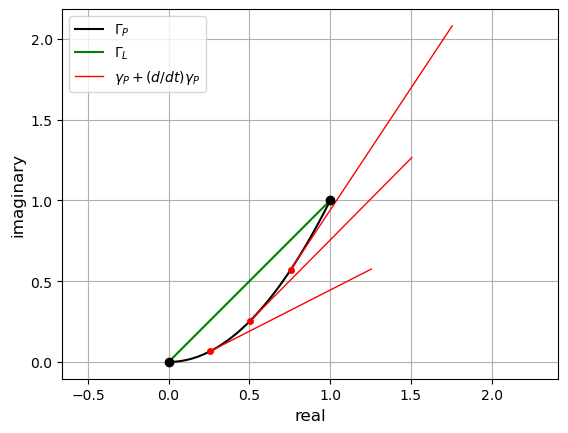

In [2]:
# curve with tangents

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

dt = 0.01
t = np.arange(dt/2,1,dt)
gamma = t + 1j*t**2
plt.plot(gamma.real, gamma.imag, 'k')
plt.plot([0,1],[0,1],'g')

tc = t[25::25]
gcr = gamma.real[25::25]
gci = gamma.imag[25::25]
N = gcr.size
dgamma = 1 + 2*tc*1j

for n in range(N):
    plt.plot([gcr[n], gcr[n]+1], [gci[n], gci[n] + 2*tc[n]], 'r', linewidth=1)
    
plt.plot(gcr, gci, 'ro',markersize=4)
    
plt.legend(['$\Gamma_P$', '$\Gamma_L$', "$\gamma_P+(d/dt)\gamma_P$"])

plt.plot([0,1],[0,1],'ko')

plt.axis('equal')
plt.grid('on')
plt.xlabel('real', fontsize=12)
plt.ylabel('imaginary', fontsize=12);

\begin{myfig}\label{fig:ctan} Two curves, the straight green $\Gamma_L$, and the parabolic black $\Gamma_P$, each joining $0$ to $1+i$. We also plot red tangent vectors to $\Gamma_P$ at three locations. \end{myfig}


\begin{exercise}\label{ex:circum}
Use (\ref{eq:Elen}) to confirm that the circumference of the circle, $C$, of radius $r$ centered at $z$ is $2\pi r$.
You may use the parametrization $\gamma_C(t) = \Re z + r\cos(t) + i(\Im z + r\sin(t))$ for $t\in[0,2\pi]$.
\end{exercise}

\begin{exercise}\label{ex:Einv}
Suppose $\Gamma$ is a curve in $\maC$ parametrized by $\gamma(t)$ for $0\le t\le 1$. We will now confirm that its length does not change when translated and/or rotated.

(a) For $z_0\in\maC$ denote by 

\begin{equation*}
\Gamma_0=\{z_0+\gamma(t):0\le t\le 1\}
\end{equation*}

the translation of $\Gamma$ by $z_0$. Show that $E(\Gamma_0)=E(\Gamma)$.

(b) For $\theta\in[0,2\pi)$ denote by 

\begin{equation*}
\Gamma_\theta=\{\cos(\theta)\Re\gamma(t) - \sin(\theta)\Im\gamma(t) + i(\sin(\theta)\Re\gamma(t) + \cos(\theta)\Im\gamma(t)): 0\le t\le 1\}
\end{equation*}

the counterclockwise rotation of $\Gamma$ around the origin by the angle $\theta$. Show that $E(\Gamma_\theta)=E(\Gamma)$.

\end{exercise}


Now to argue in general that the straight line is the shortest curve from $z_1$ to $z_2$ we note that curve length does not change when we translate or rotate a curve. As such, we suppose $z_1=0$ and $z_2=x_2$ and note that the straight line, $\Gamma_L$, is parametrized by $\gamma_L(t)=tx_2$ for $0\le t\le 1$. If $\gamma$ parametrizes any competing curve, $\Gamma$, then

\begin{equation}\label{eq:Ecomp}
  E(\Gamma) = \int_0^1 \sqrt{(\Re\gamma'(t))^2 + (\Im\gamma'(t))^2}\,dt \ge \int_0^1 \sqrt{(\Re\gamma'(t))^2}\,dt 
  \ge \int_0^1 \Re\gamma'(t) \,dt = \Re\int_0^1 \gamma'(t) \,dt = \Re(\gamma(1)-\gamma(0)) = x_2 = E(\Gamma_L)
\end{equation}



### Hyperbolic Distance

If we restrict ourselves to **real** M&ouml;bius transformations of a **complex** variable we arrive at tractable expression of their real and imaginary parts. In particular, for $z=x+iy$, we find

\begin{equation}\label{eq:muRI}
 \eqalign{
  \mu(z) = \frac{az+b}{cz+d} = \frac{(az+b)(c\ov z+d)}{|cz+d|^2} &= \frac{ac|z|^2+bd + (ad+bc)x + (ad-bc)iy}{|cz+d|^2} \cr
  &= \frac{ac|z|^2+bd + (ad+bc)x}{|cz+d|^2} + i\frac{y}{|cz+d|^2} \cr}
\end{equation}

The imaginary part is specially intriguing, namely

\begin{equation}\label{eq:muRI2}
  \Im\mu(z) = \frac{\Im z}{|cz+d|^2}
\end{equation}

has the immediate consequence that real M&ouml;bius transformations take the upper halfplane

\begin{equation}\label{eq:UHP}
   \maU \equiv \{z\in\maC:\Im z >0\}
\end{equation}

to itself. 


Let's suppose $\gamma$ is a curve and examine its distortion by $\mu$. Well

\begin{equation}\label{eq:mudist}
  (d/dt)\mu(\gamma(t)) = \mu'(\gamma(t))\gamma'(t) = \frac{-\gamma'(t)}{(c\gamma(t)+d)^2}
\end{equation}

and so

\begin{equation}\label{eq:mudist2}
  |(d/dt)\mu(\gamma(t))| = \frac{|\gamma'(t)|}{|c\gamma(t)+d|^2} = |\gamma'(t)|\frac{\Im\mu(\gamma(t))}{\Im \gamma(t)}
\end{equation}

and this suggests we try

\begin{equation}\label{eq:Hmet}
  H(\gamma) \equiv \int_0^1 \frac{|\gamma'(t)|}{\Im\gamma(t)}\,dt
\end{equation}

so

\begin{equation}\label{eq:Hmet2}
  H(\mu(\gamma)) = \int_0^1 \frac{|(d/dt)\mu(\gamma(t))|}{\Im\mu(\gamma(t))}\,dt = \int_0^1 \frac{|\gamma'(t)|}{\Im\mu(\gamma(t))}\frac{\Im\mu(\gamma(t))}{\Im \gamma(t)}\,dt = \int_0^1 \frac{|\gamma'(t)|}{\Im\gamma(t)}\,dt = H(\gamma)
\end{equation}

That is, real M&ouml;bius transformations preserve the hyperbolic length of curves in $\maU$. We note that two other quantities are preserved.

\begin{proposition}\label{prop:Hinv2} For $z,w\in\maU$ the function

\begin{equation}\label{eq:tau}
  \tau(z,w) \equiv \frac{|z-w|}{|z-\ov w|}
\end{equation}

is $H$-invariant.
\end{proposition}

**Proof:** If $\mu$ is a real M&ouml;bius transformation then

\begin{equation}\label{eq:taumu}
  \tau(\mu(z),\mu(w)) = \frac{|\mu(z)-\mu(w)|}{|\mu(z)-\ov \mu(w)|} = \frac{|\mu(z)-\mu(w)|}{|\mu(z)-\mu(\ov w)|}.
\end{equation}

We next use the simplicity of $\mu'(z)$ (\ref{eq:mudist}) to compute the required difference

\begin{equation*}
  \mu(z)-\mu(w) = \int_w^z \mu'(u)\,du = \int_w^z \frac{du}{(cu+d)^2} = \frac{-1}{c}\int_w^z \frac{d}{du}\frac{du}{cu+d}
    = \frac{-1}{c}\left(\frac{1}{cz+d}-\frac{1}{cw+d}\right)
    = \frac{w-z}{(cz+d)(cw+d)}
\end{equation*}

Substitution of this into (\ref{eq:taumu}) yields

\begin{equation*}
    \frac{|\mu(z)-\mu(w)|}{|\mu(z)-\mu(\ov w)|} = \frac{|w-z|}{|cz+d||cw+d|}\frac{|cz+d||c\ov w+d|}{|\ov w - z|}
    = \frac{|z-w|}{|z-\ov w|}
\end{equation*}

as claimed. **End of Proof.**

### Hyperbolic Lines and Circles

Given two points $z_0$ and $z_1$ in $\maU$ we look for the curve joining them with the shortest hyperbolic length. Suppose that $z_0=ai$ and $z_1=bi$ where $0<a<b$. The straight line $\gamma(t)=(bt + (1-t)a)i$ so $\gamma'(t)=(b-a)i$ and

\begin{equation}\label{eq:abHL}
   H(\gamma) = \int_0^1 \frac{(b-a)}{bt + (1-t)a}\,dt = \int_0^1 (d/dt)\log(bt + (1-t)a)\,dt = \log(b)-\log(a) = \log(b/a)
\end{equation}

If $\eta$ is a competing curve we note that

\begin{equation}\label{eq:abHL2}
   H(\eta) = \int_0^1 \frac{|\eta'(t)|}{\Im\eta(t)}\,dt = 
   \int_0^1 \frac{\sqrt{(\Re\eta'(t))^2+(\Im\eta'(t))^2}}{\Im\eta(t)}\,dt \ge
   \int_0^1 \frac{|\Im\eta'(t)|}{\Im\eta(t)}\,dt \ge
   \int_0^1 \frac{\Im\eta'(t)}{\Im\eta(t)}\,dt = \log(b/a) = H(\gamma)
\end{equation}

where equality holds only when $\Re\eta'(t)=0$ and $\Im\eta'(t)\ge 0$ for each $t$, i.e., when $\eta\sim\gamma$. It follows from this that the shortest H-line connecting $x+ia$ to $x+ib$ is the usual Euclidean straight line.

Now if $z_1$ and $z_2$ do not have the same real parts, as in Figure \ref{fig:Hline2}, we note that $z_1$ and $z_2$ lie on a unique circle centered on the real axis. To find the center, $x$, we note that the perpendicular bisector of their cord strikes the real axis at $x$. The radius is then $r=|z_2-x|=|z_1-x|$. See the code cell below for details of the construction.

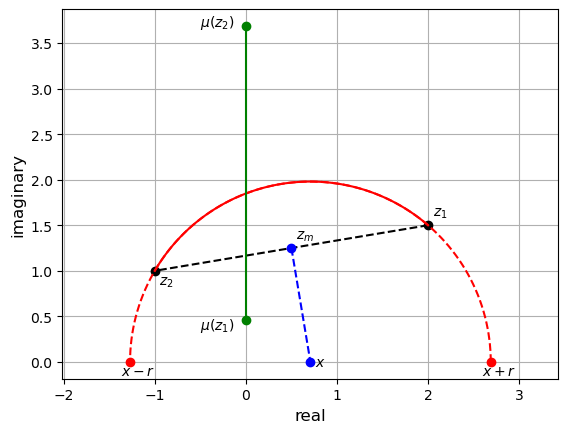

In [3]:
# Hlines as arcs

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

z2 = -1+1j
z1 = 2 + 1.5j  # 0.5+2j
plt.plot([z1.real, z2.real], [z1.imag, z2.imag], 'ko--')
plt.text(z1.real+.05, z1.imag + 0.1, '$z_1$')
plt.text(z2.real+.05, z2.imag-0.15, '$z_2$')
zm = (z1+z2)/2    # midpoint
plt.text(zm.real+.05, zm.imag+.1, '$z_m$')
m = (z1.imag - z2.imag)/(z1.real - z2.real) # slope
x = m*zm.imag + zm.real  # x-intercept of perpendicular bisector
plt.text(x.real+.05, x.imag-.05, '$x$')
r = abs(z2-x)  # radius
plt.plot([zm.real, x], [zm.imag, 0], 'bo--')
t = np.linspace(0, np.pi, 100)  # arc angle
gamma = x + r*np.cos(t) + 1j*r*np.sin(t)
plt.plot(gamma.real, gamma.imag, 'r--')
plt.plot(x+r,0,'ro')
plt.plot(x-r,0,'ro')
plt.text(x+r-.1, -.15, '$x+r$')
plt.text(x-r-.1, -.15, '$x-r$')

# now map arc from z1 to z2 using mu
t1 = np.angle(z1-x)
t2 = np.angle(z2-x)
t = np.linspace(t1, t2, 100)  # arc angle
gamma = x + r*np.cos(t) + 1j*r*np.sin(t)
plt.plot(gamma.real, gamma.imag, 'r')
y1 = np.sin(t1)/(1+np.cos(t1))
y2 = np.sin(t2)/(1+np.cos(t2))
plt.plot([0, 0], [y1, y2], 'go-')
plt.text(-.5,y1-.1,'$\mu(z_1)$')
plt.text(-.5,y2,'$\mu(z_2)$')

plt.axis('equal')
plt.grid('on')
plt.xlabel('real', fontsize=12)
plt.ylabel('imaginary', fontsize=12);

\begin{myfig}\label{fig:Hline2} The two points $z_1$ and $z_2$ lie on a unique circle, $C$, of radius $r$, centered on the real axis, at $x$. The transformation $\mu$ in (\ref{eq:mud}) takes the red arc from $z_1$ to $z_2$ to the imaginary green segment. \end{myfig}

We now delight in the M&ouml;bius transformation

\begin{equation}\label{eq:mud}
   \mu(z) = \frac{z-(x+r)}{z-(x-r)}
\end{equation}

for which $\mu(x+r)=0$ and $\mu(x-r)=\infty$ while it takes points on $C$ to the imaginary axis, more precisely

\begin{equation}\label{eq:mud2}
   \mu(x+r\cos(t)+ir\sin(t)) = \frac{x+r\cos(t)+ir\sin(t)-(x+r)}{x+r\cos(t)+ir\sin(t)-(x-r)}
   = \frac{\cos(t)-1+i\sin(t)}{\cos(t)+1+i\sin(t)}\frac{\cos(t)+1-i\sin(t)}{\cos(t)+1-i\sin(t)}
   = \frac{i\sin(t)}{1+\cos(t)}
\end{equation}

It then follows that the H-line segment joining $\mu(z_1)$ and $\mu(z_2)$ is the segment of the imaginary axis joining them. As $\mu$ is real it does not distort H-length it follows that the arc of $C$ is the H-line joining $z_1$ and $z_2$. It follows that the hyperboic distance from $z_1$ to $z_2$ is $\log(\mu(z_2)/\mu(z_1))$. As expressed by (\ref{eq:mud2}) 

\begin{equation}\label{eq:mud3}
   d_H(z_1,z_2) = \log\left(\frac{\sin(t_2)}{1+\cos(t_2)}\frac{1+\cos(t_1)}{\sin(t_1)}\right)
    \where t_j = \arg(z_j-x)
\end{equation}

this distance is cumbersome. To arrive at a more managable expression we note that $\mu(z_1) = ki$ for some $k$ and so

\begin{equation}\label{eq:muT}
   \mu_k(z) \equiv \frac{1}{k}\frac{z-(x+r)}{z-(x-r)}
\end{equation}

is a real M&ouml;bius transfromation that takes $x+r$ to $0$, $x-r$ to $\infty$ and $z_1$ to $i$. If $\mu_k(z_2)=iq$ then $q>1$ and $d_H(z_1,z_2)=d_H(\mu_k(z_1),\mu_k(z_2)) = d_H(i,iq) = \log(q)$.

In like fashion

\begin{equation}\label{eq:taumuk}
  \tau(z_1,z_2) = \tau(\mu_k(z_1),\mu_k(z_2)) = \tau(i,iq) = \frac{|i-iq|}{|i+iq|} = \frac{q-1}{q+1} = 
   \frac{\exp(d_H(z_1,z_2))-1}{\exp(d_H(z_1,z_2))+1}
\end{equation}

We solve this for $\exp(d_H(z_1,z_2))$ and take logs to arrive at

\begin{equation}\label{eq:taumuk2}
   d_H(z_1,z_2) = \log\left(\frac{1+\tau(z_1,z_2)}{1-\tau(z_1,z_2)}\right)
     = \log\left(\frac{|z_1-\ov z_2|+|z_1-z_2|}{|z_1-\ov z_2|-|z_1-z_2|}\right)
\end{equation}

which is explicit in $z_1$ and $z_2$. We can proceed still further from the identities

\begin{equation}\label{eq:hIds}
  \frac{\exp(u)-1}{\exp(u)+1} = \tanh(u/2) \and \sinh^2(u/2) = \frac{\tanh^2(u/2)}{1-\tanh^2(u/2)}
\end{equation}

to express

\begin{equation}\label{eq:hIds2}
  \sinh^2(d_H(z_1,z_2)/2) = \frac{\tau^2(z_1,z_2)}{1-\tau^2(z_1,z_2)} = \frac{|z_1-z_2|^2}{|z_1-\ov z_2|^2-|z_1-z_2|^2}
\end{equation}

and finally, as

\begin{equation}\label{eq:hIds3}
  |z_1-\ov z_2|^2-|z_1-z_2|^2 = 4\Im(z_1)\Im(z_2)
\end{equation}

we arrive at the compact expression

\begin{equation}\label{eq:hIds4}
  \boxed{\sinh^2(d_H(z_1,z_2)/2) = \frac{|z_1-z_2|^2}{4\Im(z_1)\Im(z_2)}}
\end{equation}

\begin{exercise}\label{ex:Hids}
Please confirm the three identities in (\ref{eq:hIds}) and (\ref{eq:hIds3}) 
\end{exercise}

We can use this final expression to study hyperbolic circles. In particular, the H-circle of radius $r$ centered at $i$ are those $z\in\maU$ for which $d_H(i,z) = r$. In other words, those $z$ for which $\sinh^2(d_H(i,z)/2) = \sinh^2(r/2)$. That is

\begin{equation}\label{eq:Hcirc}
   \frac{|i-z|^2}{4\Im(z)} = \sinh^2(r/2)
\end{equation}

or, with $z=x+iy$

\begin{equation}\label{eq:Hcirc2}
   x^2+(1-y)^2 = 4y\sinh^2(r/2)
\end{equation}

i.e.,

\begin{equation}\label{eq:Hcirc3}
   x^2+y^2+1 = 2y(2\sinh^2(r/2)+1) = 2y\cosh(r)
\end{equation}

and so

\begin{equation}\label{eq:Hcirc4}
   C_H(i,r) = \{x+iy: x^2+(y-\cosh(r))^2 = \sinh^2(r)\} = C_E(i\cosh(r), \sinh(r))
\end{equation}

\begin{exercise}\label{ex:Hcirc}
Please show that $C_H(x_0+iy_0, r) = C_E(x_0+iy_0\cosh(r), y_0\sinh(r))$
\end{exercise}


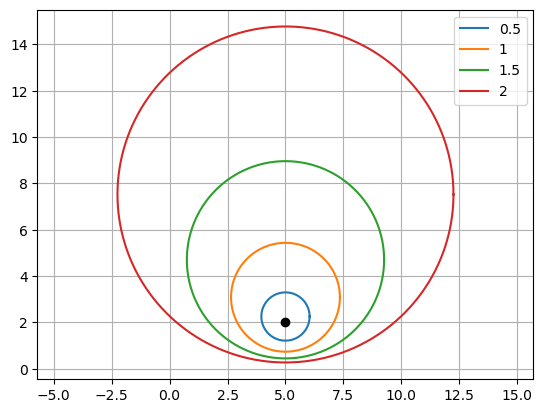

In [4]:
# Hcirc

import numpy as np
import matplotlib.pyplot as plt

x0 = 5
y0 = 2
rads = [1/2, 1, 3/2, 2]
t = np.linspace(0, 2*np.pi, 1000)

for r in rads:  
    R = y0*np.sinh(r)
    plt.plot(x0 + R*np.cos(t), y0*np.cosh(r) + R*np.sin(t))
    
plt.legend(rads)
plt.plot(x0,y0,'ko')

plt.axis('equal')
plt.grid('on');

\begin{myfig}\label{fig:Hcirc} Four concentric Hyperbolic circles. Centered at black dot, colored by radii in legend. \end{myfig} 